<a href="https://colab.research.google.com/github/PaolinaCastany/Company_Sales_Profiling/blob/main/ThesisPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
SETUP - Create Project Folders in Google Drive
Run this ONCE at the beginning
"""

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define folder structure
BASE_FOLDER = '/content/drive/MyDrive/Thesis_Music_Success'
FOLDERS = {
    'data': os.path.join(BASE_FOLDER, 'data'),
    'plots': os.path.join(BASE_FOLDER, 'plots'),
    'models': os.path.join(BASE_FOLDER, 'models'),
    'results': os.path.join(BASE_FOLDER, 'results')
}

# Create all folders
for folder_name, folder_path in FOLDERS.items():
    os.makedirs(folder_path, exist_ok=True)
    print(f"✓ Created: {folder_name} → {folder_path}")

print("\n" + "="*60)
print("FOLDER STRUCTURE READY!")
print("="*60)
print(f"Base folder: {BASE_FOLDER}")

# Save folder paths for later use
import pickle
with open('/content/folders.pkl', 'wb') as f:
    pickle.dump(FOLDERS, f)
print("\n✓ Folder paths saved")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Created: data → /content/drive/MyDrive/Thesis_Music_Success/data
✓ Created: plots → /content/drive/MyDrive/Thesis_Music_Success/plots
✓ Created: models → /content/drive/MyDrive/Thesis_Music_Success/models
✓ Created: results → /content/drive/MyDrive/Thesis_Music_Success/results

FOLDER STRUCTURE READY!
Base folder: /content/drive/MyDrive/Thesis_Music_Success

✓ Folder paths saved


MUSIC SUCCESS PREDICTION - EDA & DATA PREPARATION
Author: Paolina CASTANY
Date: 2025-10-25 07:19

1. DATA LOADING
Using Colab cache for faster access to the 'spotify-1million-tracks' dataset.

✓ Dataset loaded successfully
   Shape: 1,159,764 rows × 20 columns
   Memory: 428.38 MB

2. INITIAL DATA EXPLORATION

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key            

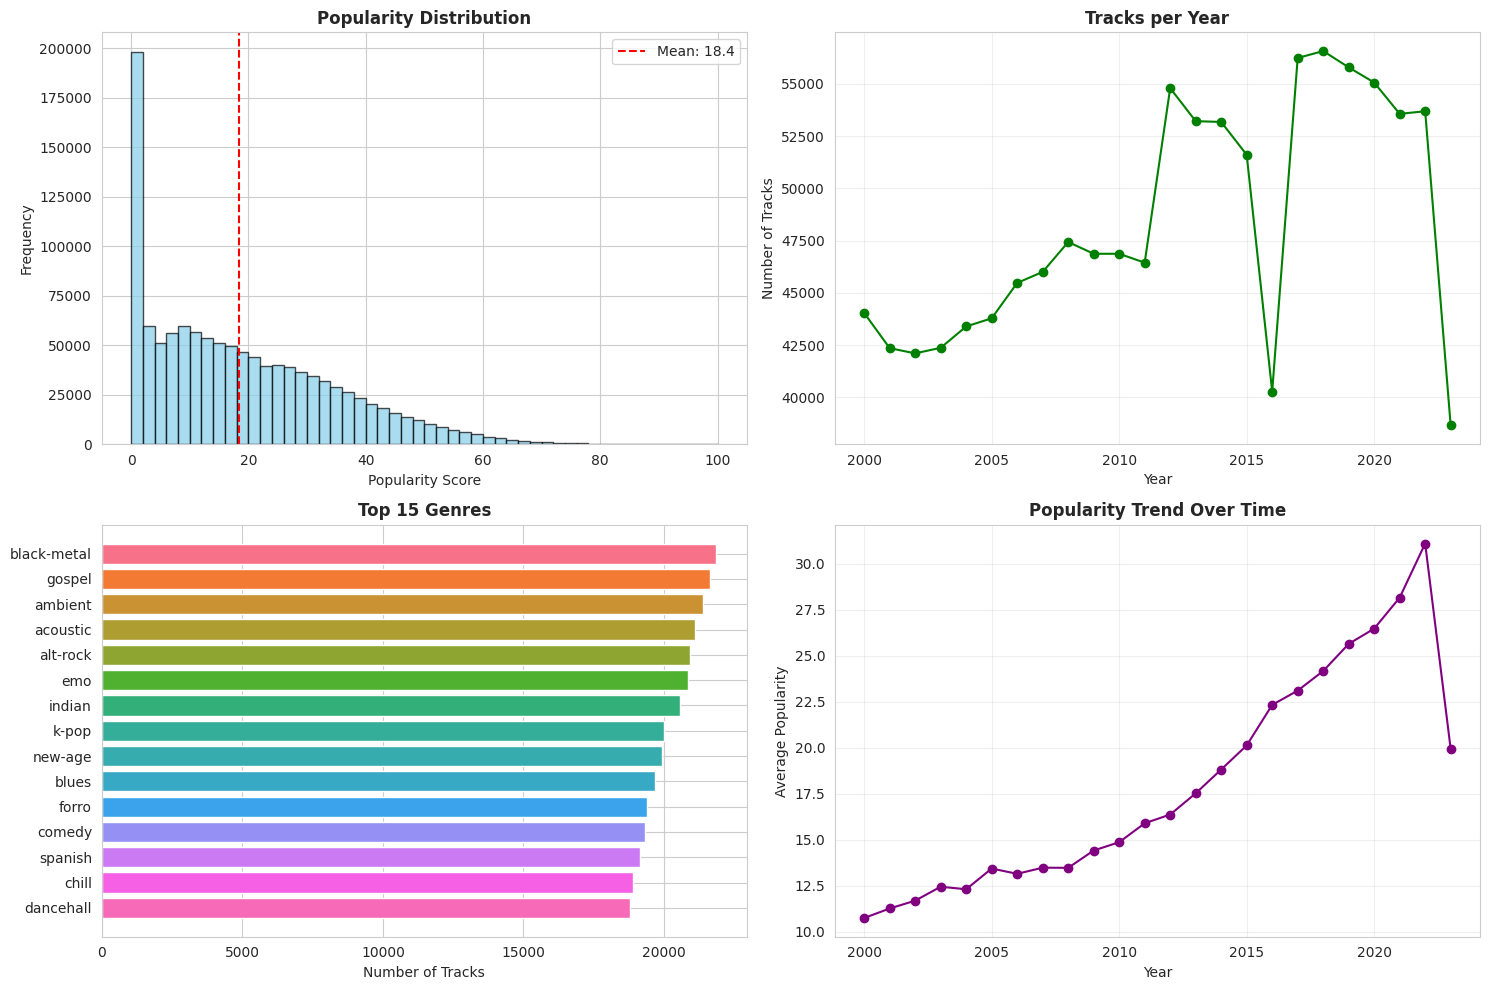


3. DATA CLEANING
✓ Removed 16 rows with missing data

Data cleaning summary:
   Original: 1,159,764 tracks
   Cleaned: 1,159,748 tracks
   Removed: 16 (0.00%)
✓ Saved data: spotify_cleaned.csv

4. AUDIO FEATURES ANALYSIS

🎵 Analyzing 13 audio features

📊 Feature Statistics:
       danceability        energy           key      loudness          mode  \
count  1.159748e+06  1.159748e+06  1.159748e+06  1.159748e+06  1.159748e+06   
mean   5.374425e-01  6.396737e-01  5.287763e+00 -8.981292e+00  6.346560e-01   
std    1.844753e-01  2.704993e-01  3.555204e+00  5.682203e+00  4.815267e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00 -5.810000e+01  0.000000e+00   
25%    4.130000e-01  4.540000e-01  2.000000e+00 -1.082900e+01  0.000000e+00   
50%    5.500000e-01  6.940000e-01  5.000000e+00 -7.450000e+00  1.000000e+00   
75%    6.770000e-01  8.730000e-01  8.000000e+00 -5.276000e+00  1.000000e+00   
max    9.930000e-01  1.000000e+00  1.100000e+01  6.172000e+00  1.000000e+00   

        spee

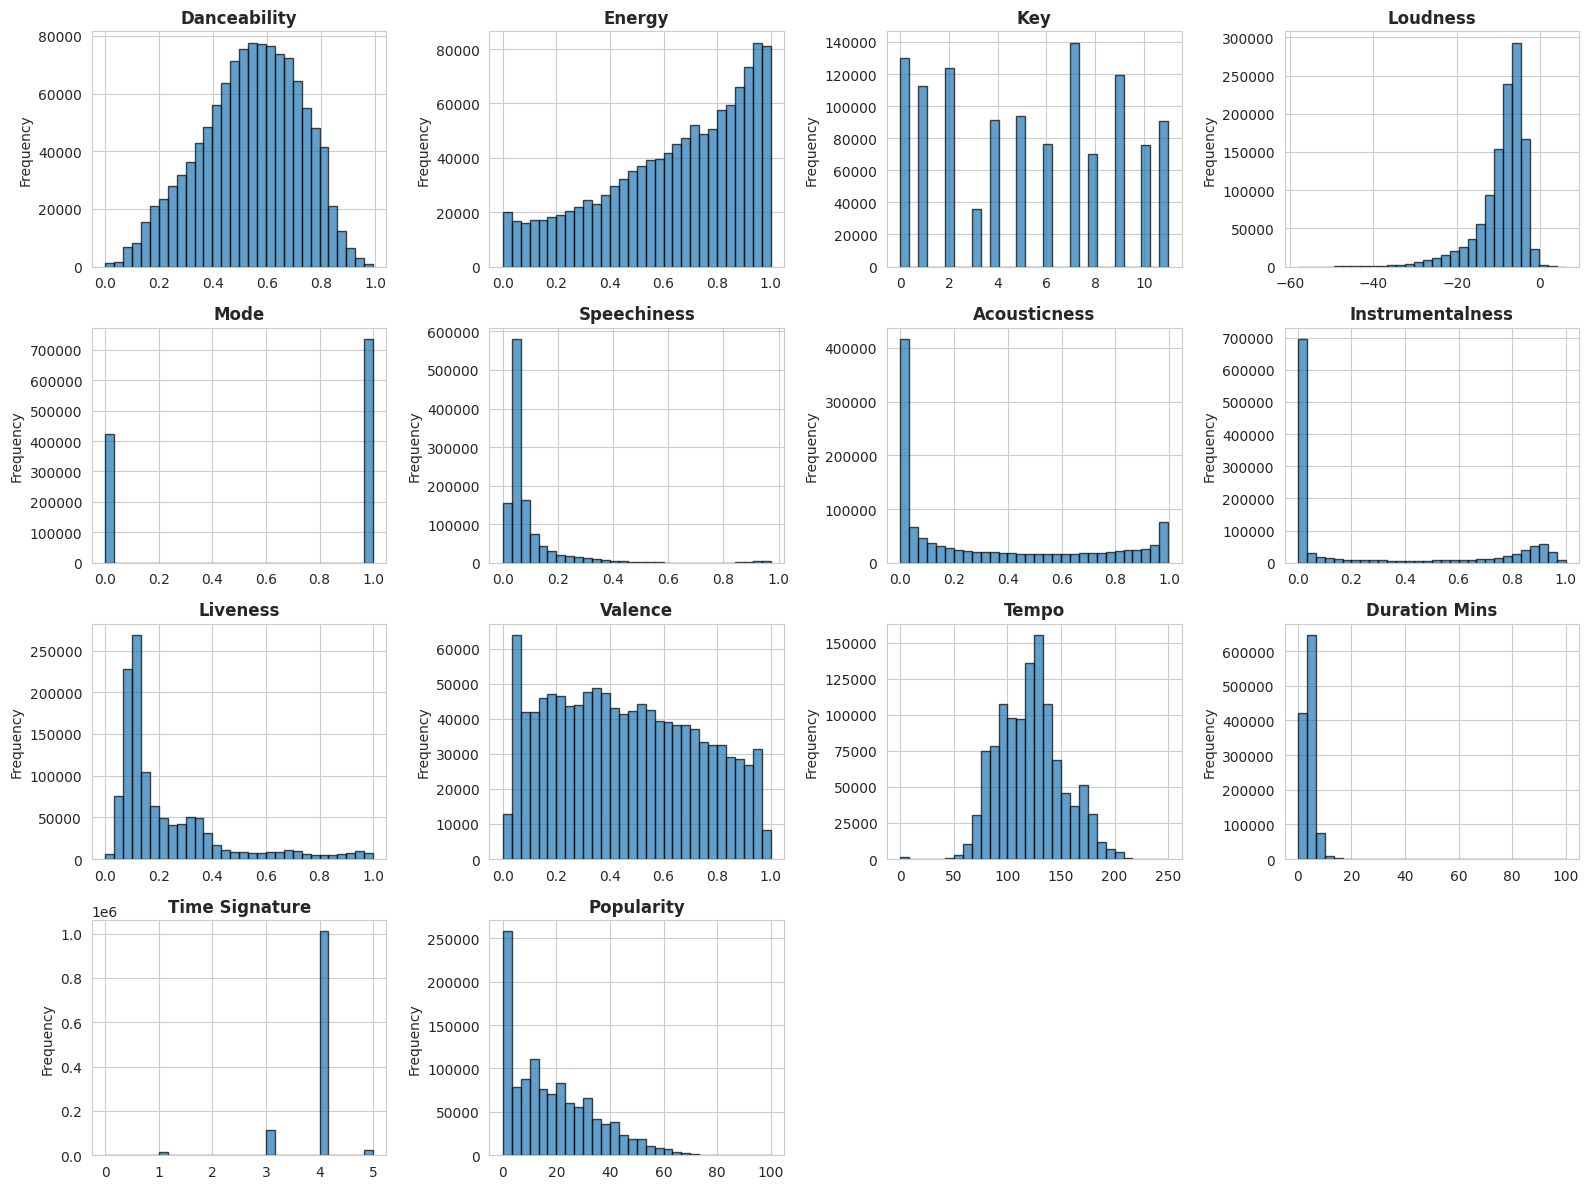

✓ Saved plot: 03_correlation_matrix.png


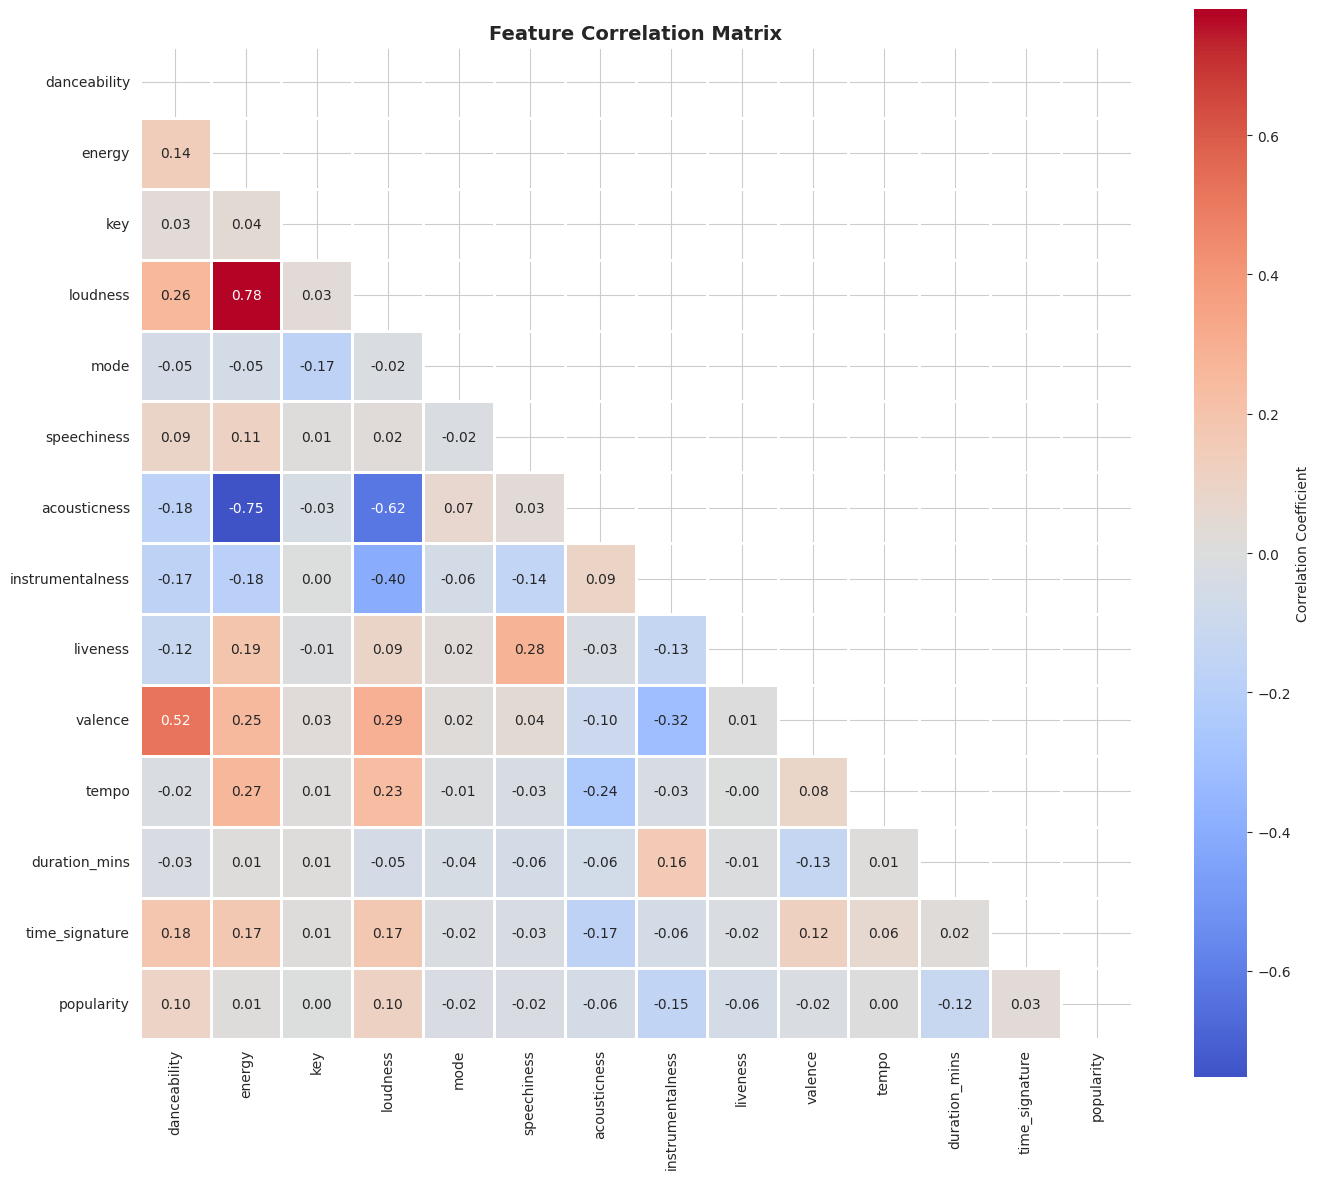

✓ Saved data: correlation_matrix.csv

🔍 Highly Correlated Feature Pairs (|r| > 0.7):
   energy               <-> loudness            :  0.781
   energy               <-> acousticness        : -0.753

5. GENRE SELECTION

Total genres: 82
Selection criteria: Minimum 15,000 tracks per genre

✓ Selected 8 genres:
   1. black-metal         :  21,837 tracks ( 1.88%)
   2. gospel              :  21,621 tracks ( 1.86%)
   3. ambient             :  21,389 tracks ( 1.84%)
   4. acoustic            :  21,097 tracks ( 1.82%)
   5. alt-rock            :  20,918 tracks ( 1.80%)
   6. emo                 :  20,845 tracks ( 1.80%)
   7. indian              :  20,583 tracks ( 1.77%)
   8. k-pop               :  20,004 tracks ( 1.72%)

Filtered dataset: 168,294 tracks (14.51% of total)
✓ Saved plot: 04_genre_distribution.png


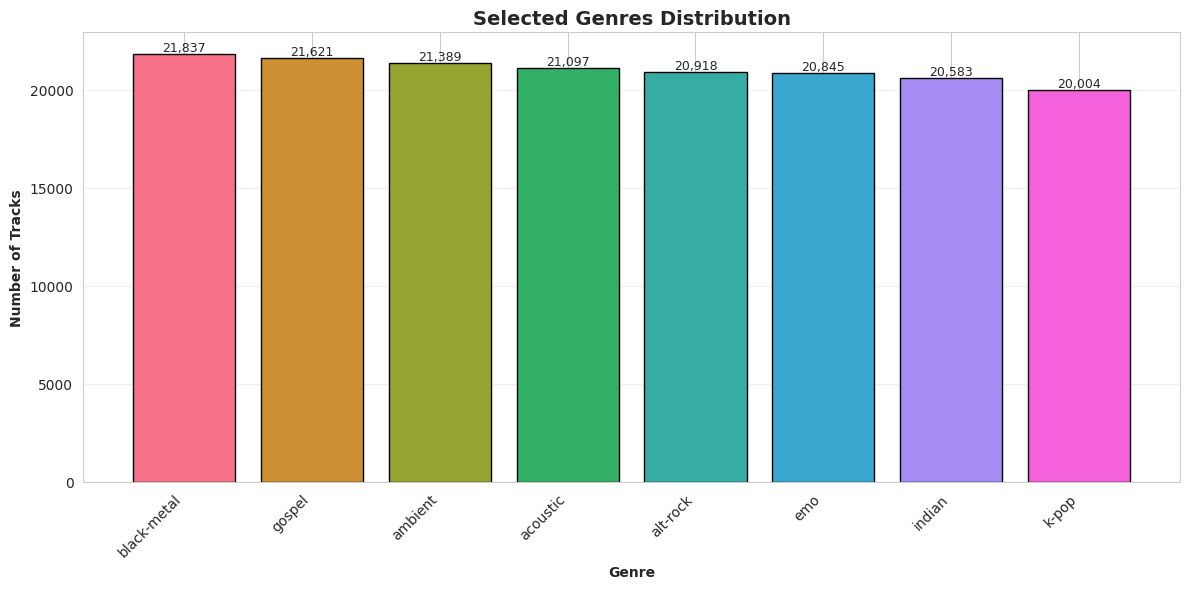

✓ Saved data: selected_genres.csv
✓ Saved data: spotify_filtered.csv

6. TARGET VARIABLE ENGINEERING

Target variables:
   1. Continuous: 'popularity' (0-100) → Regression
   2. Binary: 'is_hit' (popularity >= 50) → Classification

📊 Class Distribution:
   Hits (>= 50): 7,621 (4.53%)
   Non-hits: 160,673 (95.47%)
   Imbalance ratio: 21.1:1

📈 Hit Rate by Genre:
   black-metal         :    6 / 21,837 ( 0.03%)
   gospel              :  367 / 21,621 ( 1.70%)
   ambient             :  443 / 21,389 ( 2.07%)
   acoustic            :  360 / 21,097 ( 1.71%)
   alt-rock            : 3,098 / 20,918 (14.81%)
   emo                 :  968 / 20,845 ( 4.64%)
   indian              :  309 / 20,583 ( 1.50%)
   k-pop               : 2,070 / 20,004 (10.35%)
✓ Saved data: genre_hit_rates.csv
✓ Saved plot: 05_target_distribution.png


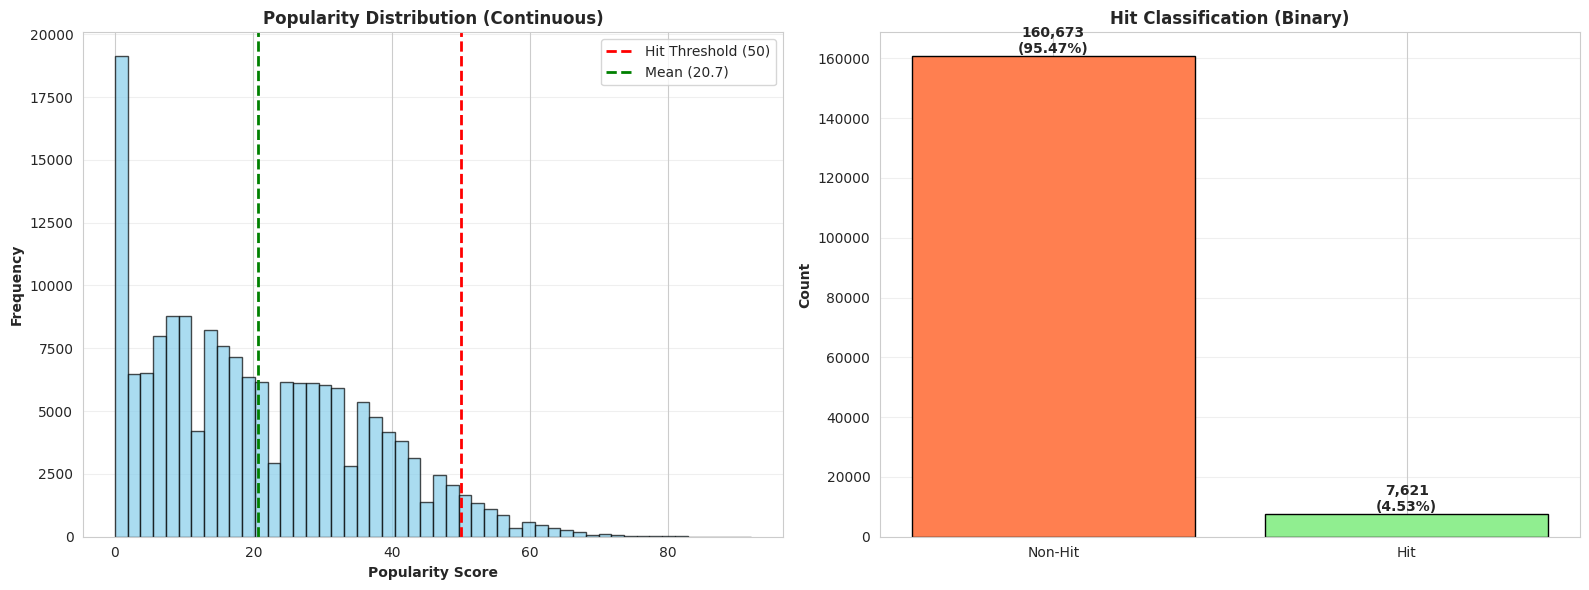


7. GENRE-SPECIFIC STATISTICS

BLACK-METAL:
   Tracks: 21,837
   Popularity: 11.08 ± 8.58
   Hit Rate: 0.03%
   Danceability: 0.265 | Energy: 0.834

GOSPEL:
   Tracks: 21,621
   Popularity: 18.92 ± 11.28
   Hit Rate: 1.70%
   Danceability: 0.515 | Energy: 0.581

AMBIENT:
   Tracks: 21,389
   Popularity: 20.01 ± 13.36
   Hit Rate: 2.07%
   Danceability: 0.329 | Energy: 0.263

ACOUSTIC:
   Tracks: 21,097
   Popularity: 17.83 ± 13.20
   Hit Rate: 1.71%
   Danceability: 0.535 | Energy: 0.428

ALT-ROCK:
   Tracks: 20,918
   Popularity: 38.60 ± 10.37
   Hit Rate: 14.81%
   Danceability: 0.502 | Energy: 0.740

EMO:
   Tracks: 20,845
   Popularity: 23.66 ± 14.85
   Hit Rate: 4.64%
   Danceability: 0.465 | Energy: 0.763

INDIAN:
   Tracks: 20,583
   Popularity: 8.79 ± 12.99
   Hit Rate: 1.50%
   Danceability: 0.536 | Energy: 0.567

K-POP:
   Tracks: 20,004
   Popularity: 27.74 ± 16.62
   Hit Rate: 10.35%
   Danceability: 0.622 | Energy: 0.685
✓ Saved data: genre_statistics.csv
✓ Saved plot: 06_

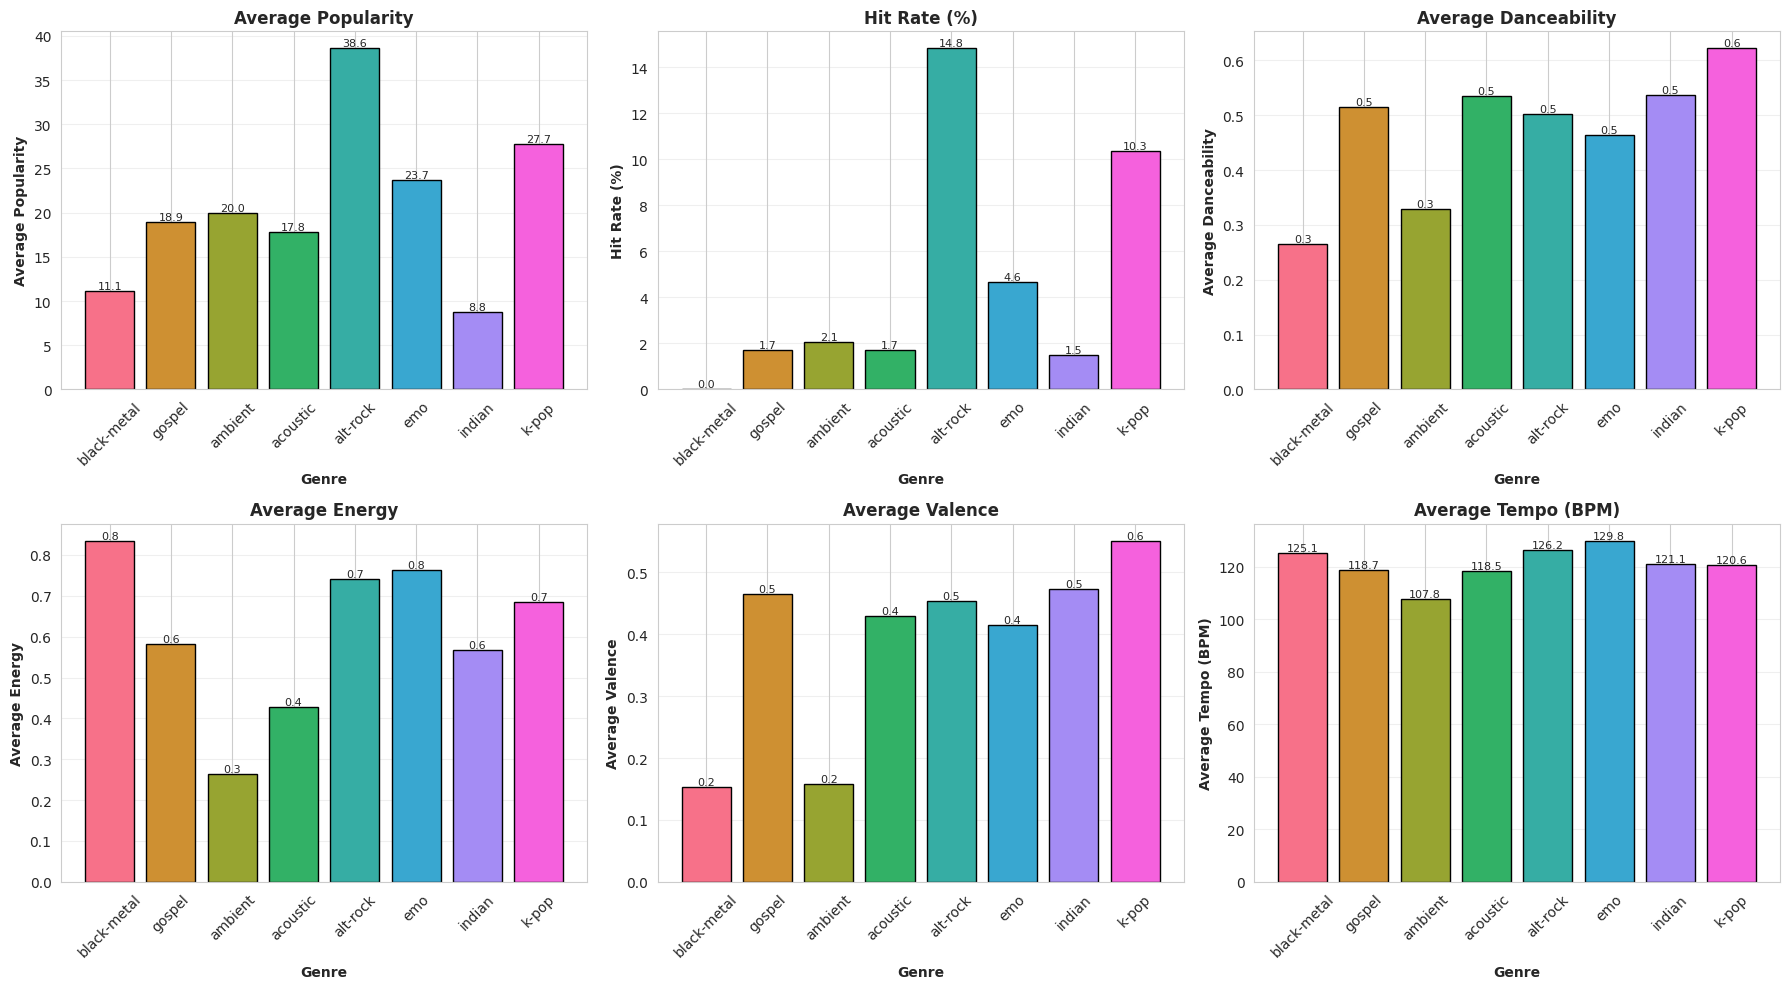


8. TEMPORAL TRAIN/TEST SPLIT

Split strategy:
   Training: tracks before 2019
   Testing: tracks from 2019 onwards
   Rationale: Prevent data leakage, simulate real-world prediction

✓ Split complete:
   Train: 133,496 tracks (79.3%)
   Test: 34,798 tracks (20.7%)

📊 Distribution Check:

Genre                Train      Test       Train %    Test %
------------------------------------------------------------
black-metal          17,253      4,584      12.92%    13.17%
gospel               17,148      4,473      12.85%    12.85%
ambient              17,090      4,299      12.80%    12.35%
acoustic             16,693      4,404      12.50%    12.66%
alt-rock             16,767      4,151      12.56%    11.93%
emo                  16,515      4,330      12.37%    12.44%
indian               16,192      4,391      12.13%    12.62%
k-pop                15,838      4,166      11.86%    11.97%

🎯 Hit Rate Distribution:
   Train: 3.29%
   Test: 9.28%
✓ Saved data: spotify_train.csv
✓ Saved dat

In [ ]:
"""
================================================================================
MASTER THESIS - MSc in Big Data & Business Analytics
Author: Paolina CASTANY

MUSIC SUCCESS PREDICTION: GENRE-SPECIFIC VS GLOBAL MODELS
Research Question: To what extent do different genres require genre-specific
                   models to predict musical success from audio features?

NOTEBOOK 1: EXPLORATORY DATA ANALYSIS & DATA PREPARATION
================================================================================
"""

# ============================================================================
# SETUP
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
from scipy import stats
import kagglehub

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("MUSIC SUCCESS PREDICTION - EDA & DATA PREPARATION")
print("="*80)
print(f"Author: Paolina CASTANY")
print(f"Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}")
print("="*80)

# Load folder paths
with open('/content/folders.pkl', 'rb') as f:
    FOLDERS = pickle.load(f)

DATA_FOLDER = FOLDERS['data']
PLOTS_FOLDER = FOLDERS['plots']

# Helper functions
def save_plot(filename):
    """Save plot to plots folder"""
    filepath = os.path.join(PLOTS_FOLDER, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"✓ Saved plot: {filename}")
    return filepath

def save_data(df, filename):
    """Save dataframe to data folder"""
    filepath = os.path.join(DATA_FOLDER, filename)
    df.to_csv(filepath, index=False)
    print(f"✓ Saved data: {filename}")
    return filepath

# ============================================================================
# 1. DATA LOADING
# ============================================================================
print("\n" + "="*80)
print("1. DATA LOADING")
print("="*80)

path = kagglehub.dataset_download("amitanshjoshi/spotify-1million-tracks")
df = pd.read_csv(os.path.join(path, 'spotify_data.csv'))

print(f"\n✓ Dataset loaded successfully")
print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ============================================================================
# 2. INITIAL EXPLORATION
# ============================================================================
print("\n" + "="*80)
print("2. INITIAL DATA EXPLORATION")
print("="*80)

print("\n📋 Dataset Info:")
print(df.info())

print("\n📊 Descriptive Statistics:")
print(df.describe())

print("\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    missing_df = pd.DataFrame({
        'Missing_Count': missing[missing > 0],
        'Percentage': (missing[missing > 0] / len(df)) * 100
    })
    print(missing_df)
else:
    print("   No missing values!")

print("\n🎵 Unique Genres:", df['genre'].nunique())
print(f"   Top 10 genres:\n{df['genre'].value_counts().head(10)}")

# VISUALIZATION 1: Initial Exploration
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Popularity distribution
axes[0, 0].hist(df['popularity'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(df['popularity'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["popularity"].mean():.1f}')
axes[0, 0].set_xlabel('Popularity Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Popularity Distribution', fontweight='bold')
axes[0, 0].legend()

# Year distribution
year_counts = df['year'].value_counts().sort_index()
axes[0, 1].plot(year_counts.index, year_counts.values, marker='o', color='green')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Tracks')
axes[0, 1].set_title('Tracks per Year', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Top genres
top_genres = df['genre'].value_counts().head(15)
axes[1, 0].barh(range(len(top_genres)), top_genres.values,
                color=sns.color_palette("husl", 15))
axes[1, 0].set_yticks(range(len(top_genres)))
axes[1, 0].set_yticklabels(top_genres.index)
axes[1, 0].set_xlabel('Number of Tracks')
axes[1, 0].set_title('Top 15 Genres', fontweight='bold')
axes[1, 0].invert_yaxis()

# Average popularity by year
yearly_pop = df.groupby('year')['popularity'].mean()
axes[1, 1].plot(yearly_pop.index, yearly_pop.values, marker='o', color='purple')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Popularity')
axes[1, 1].set_title('Popularity Trend Over Time', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
save_plot('01_initial_exploration.png')
plt.show()

# ============================================================================
# 3. DATA CLEANING
# ============================================================================
print("\n" + "="*80)
print("3. DATA CLEANING")
print("="*80)

df_clean = df.copy()
initial_size = len(df_clean)

# Remove unnecessary columns
df_clean = df_clean.drop(['Unnamed: 0', 'track_id'], axis=1)

# Handle missing values
df_clean = df_clean.dropna(subset=['track_name', 'artist_name'])
print(f"✓ Removed {initial_size - len(df_clean)} rows with missing data")

# Remove duplicates
duplicates = df_clean.duplicated(subset=['track_name', 'artist_name'], keep='first').sum()
if duplicates > 0:
    df_clean = df_clean.drop_duplicates(subset=['track_name', 'artist_name'], keep='first')
    print(f"✓ Removed {duplicates} duplicate tracks")

# Ensure valid popularity
df_clean = df_clean[df_clean['popularity'].between(0, 100)]

# Add duration in minutes
df_clean['duration_mins'] = df_clean['duration_ms'] / 60000

print(f"\nData cleaning summary:")
print(f"   Original: {initial_size:,} tracks")
print(f"   Cleaned: {len(df_clean):,} tracks")
print(f"   Removed: {initial_size - len(df_clean):,} ({(initial_size - len(df_clean))/initial_size*100:.2f}%)")

save_data(df_clean, 'spotify_cleaned.csv')

# ============================================================================
# 4. FEATURE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("4. AUDIO FEATURES ANALYSIS")
print("="*80)

audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature']

print(f"\n🎵 Analyzing {len(audio_features)} audio features")

# Feature statistics
print("\n📊 Feature Statistics:")
print(df_clean[audio_features].describe())

# Correlation analysis
print("\n🔗 Correlation with Popularity:")
correlations = df_clean[audio_features + ['popularity']].corr()['popularity'].drop('popularity')
correlations = correlations.sort_values(ascending=False)
print(correlations)

# VISUALIZATION 2: Feature Distributions
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(audio_features + ['popularity']):
    if idx < len(axes):
        axes[idx].hist(df_clean[feature], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(feature.replace('_', ' ').title(), fontweight='bold')
        axes[idx].set_ylabel('Frequency')

# Hide empty subplots
for idx in range(len(audio_features) + 1, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
save_plot('02_feature_distributions.png')
plt.show()

# VISUALIZATION 3: Correlation Matrix
plt.figure(figsize=(14, 12))
corr_matrix = df_clean[audio_features + ['popularity']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, mask=mask,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
save_plot('03_correlation_matrix.png')
plt.show()

# Save correlation matrix
save_data(corr_matrix, 'correlation_matrix.csv')

# Identify highly correlated pairs
print("\n🔍 Highly Correlated Feature Pairs (|r| > 0.7):")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_val
            })
            print(f"   {corr_matrix.columns[i]:20s} <-> {corr_matrix.columns[j]:20s}: {corr_val:6.3f}")

if not corr_pairs:
    print("   No highly correlated pairs found")

# ============================================================================
# 5. GENRE SELECTION
# ============================================================================
print("\n" + "="*80)
print("5. GENRE SELECTION")
print("="*80)

MIN_TRACKS = 15000
MAX_GENRES = 8

genre_counts = df_clean['genre'].value_counts()
print(f"\nTotal genres: {len(genre_counts)}")
print(f"Selection criteria: Minimum {MIN_TRACKS:,} tracks per genre")

valid_genres = genre_counts[genre_counts >= MIN_TRACKS]
selected_genres = valid_genres.head(MAX_GENRES).index.tolist()

print(f"\n✓ Selected {len(selected_genres)} genres:")
for i, genre in enumerate(selected_genres, 1):
    count = genre_counts[genre]
    pct = count / len(df_clean) * 100
    print(f"   {i}. {genre:20s}: {count:7,} tracks ({pct:5.2f}%)")

# Filter dataset
df_filtered = df_clean[df_clean['genre'].isin(selected_genres)].copy()
print(f"\nFiltered dataset: {len(df_filtered):,} tracks ({len(df_filtered)/len(df_clean)*100:.2f}% of total)")

# VISUALIZATION 4: Selected Genres Distribution
plt.figure(figsize=(12, 6))
genre_dist = df_filtered['genre'].value_counts()
colors = sns.color_palette("husl", len(genre_dist))
bars = plt.bar(range(len(genre_dist)), genre_dist.values, color=colors, edgecolor='black')
plt.xticks(range(len(genre_dist)), genre_dist.index, rotation=45, ha='right')
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Number of Tracks', fontweight='bold')
plt.title('Selected Genres Distribution', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
save_plot('04_genre_distribution.png')
plt.show()

save_data(pd.DataFrame({'genre': selected_genres}), 'selected_genres.csv')
save_data(df_filtered, 'spotify_filtered.csv')

# ============================================================================
# 6. TARGET VARIABLE ENGINEERING
# ============================================================================
print("\n" + "="*80)
print("6. TARGET VARIABLE ENGINEERING")
print("="*80)

HIT_THRESHOLD = 50

print(f"\nTarget variables:")
print(f"   1. Continuous: 'popularity' (0-100) → Regression")
print(f"   2. Binary: 'is_hit' (popularity >= {HIT_THRESHOLD}) → Classification")

# Create binary target
df_filtered['is_hit'] = (df_filtered['popularity'] >= HIT_THRESHOLD).astype(int)

# Statistics
hit_count = df_filtered['is_hit'].sum()
non_hit_count = len(df_filtered) - hit_count
hit_rate = hit_count / len(df_filtered) * 100

print(f"\n📊 Class Distribution:")
print(f"   Hits (>= {HIT_THRESHOLD}): {hit_count:,} ({hit_rate:.2f}%)")
print(f"   Non-hits: {non_hit_count:,} ({100-hit_rate:.2f}%)")
print(f"   Imbalance ratio: {non_hit_count/hit_count:.1f}:1")

if (non_hit_count/hit_count) > 100:
    print(f"\n⚠️  WARNING: Extreme class imbalance!")
    print(f"   Will require SMOTE or class weights in modeling")

# Hit rate by genre
print(f"\n📈 Hit Rate by Genre:")
genre_stats = []
for genre in selected_genres:
    genre_data = df_filtered[df_filtered['genre'] == genre]
    genre_hits = genre_data['is_hit'].sum()
    genre_hit_rate = (genre_hits / len(genre_data)) * 100
    genre_stats.append({
        'Genre': genre,
        'Total': len(genre_data),
        'Hits': genre_hits,
        'Hit_Rate_%': genre_hit_rate
    })
    print(f"   {genre:20s}: {genre_hits:4,} / {len(genre_data):6,} ({genre_hit_rate:5.2f}%)")

genre_stats_df = pd.DataFrame(genre_stats)
save_data(genre_stats_df, 'genre_hit_rates.csv')

# VISUALIZATION 5: Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Continuous
axes[0].hist(df_filtered['popularity'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(HIT_THRESHOLD, color='red', linestyle='--', linewidth=2,
                label=f'Hit Threshold ({HIT_THRESHOLD})')
axes[0].axvline(df_filtered['popularity'].mean(), color='green', linestyle='--',
                linewidth=2, label=f'Mean ({df_filtered["popularity"].mean():.1f})')
axes[0].set_xlabel('Popularity Score', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Popularity Distribution (Continuous)', fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Binary
hit_counts = df_filtered['is_hit'].value_counts()
colors_bar = ['coral', 'lightgreen']
bars = axes[1].bar(['Non-Hit', 'Hit'], hit_counts.values, color=colors_bar, edgecolor='black')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].set_title('Hit Classification (Binary)', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, (bar, v) in enumerate(zip(bars, hit_counts.values)):
    pct = v / len(df_filtered) * 100
    axes[1].text(bar.get_x() + bar.get_width()/2., v,
                 f'{v:,}\n({pct:.2f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
save_plot('05_target_distribution.png')
plt.show()

# ============================================================================
# 7. GENRE-SPECIFIC ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("7. GENRE-SPECIFIC STATISTICS")
print("="*80)

genre_analysis = []
for genre in selected_genres:
    genre_data = df_filtered[df_filtered['genre'] == genre]

    stats = {
        'genre': genre,
        'total_tracks': len(genre_data),
        'avg_popularity': genre_data['popularity'].mean(),
        'std_popularity': genre_data['popularity'].std(),
        'hit_rate_%': (genre_data['is_hit'].sum() / len(genre_data)) * 100,
        'avg_danceability': genre_data['danceability'].mean(),
        'avg_energy': genre_data['energy'].mean(),
        'avg_valence': genre_data['valence'].mean(),
        'avg_tempo': genre_data['tempo'].mean()
    }
    genre_analysis.append(stats)

    print(f"\n{genre.upper()}:")
    print(f"   Tracks: {stats['total_tracks']:,}")
    print(f"   Popularity: {stats['avg_popularity']:.2f} ± {stats['std_popularity']:.2f}")
    print(f"   Hit Rate: {stats['hit_rate_%']:.2f}%")
    print(f"   Danceability: {stats['avg_danceability']:.3f} | Energy: {stats['avg_energy']:.3f}")

genre_analysis_df = pd.DataFrame(genre_analysis)
save_data(genre_analysis_df, 'genre_statistics.csv')

# VISUALIZATION 6: Genre Statistics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
colors = sns.color_palette("husl", len(selected_genres))

metrics = [
    ('avg_popularity', 'Average Popularity'),
    ('hit_rate_%', 'Hit Rate (%)'),
    ('avg_danceability', 'Average Danceability'),
    ('avg_energy', 'Average Energy'),
    ('avg_valence', 'Average Valence'),
    ('avg_tempo', 'Average Tempo (BPM)')
]

for idx, (metric, title) in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    bars = ax.bar(genre_analysis_df['genre'], genre_analysis_df[metric],
                   color=colors, edgecolor='black')
    ax.set_xlabel('Genre', fontweight='bold')
    ax.set_ylabel(title, fontweight='bold')
    ax.set_title(title, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
save_plot('06_genre_statistics.png')
plt.show()

# ============================================================================
# 8. TEMPORAL SPLIT
# ============================================================================
print("\n" + "="*80)
print("8. TEMPORAL TRAIN/TEST SPLIT")
print("="*80)

TEST_YEAR = 2019

print(f"\nSplit strategy:")
print(f"   Training: tracks before {TEST_YEAR}")
print(f"   Testing: tracks from {TEST_YEAR} onwards")
print(f"   Rationale: Prevent data leakage, simulate real-world prediction")

df_train = df_filtered[df_filtered['year'] < TEST_YEAR].copy()
df_test = df_filtered[df_filtered['year'] >= TEST_YEAR].copy()

print(f"\n✓ Split complete:")
print(f"   Train: {len(df_train):,} tracks ({len(df_train)/len(df_filtered)*100:.1f}%)")
print(f"   Test: {len(df_test):,} tracks ({len(df_test)/len(df_filtered)*100:.1f}%)")

# Check distribution
print(f"\n📊 Distribution Check:")
print(f"\n{'Genre':<20} {'Train':<10} {'Test':<10} {'Train %':<10} {'Test %'}")
print("-" * 60)
for genre in selected_genres:
    train_count = len(df_train[df_train['genre'] == genre])
    test_count = len(df_test[df_test['genre'] == genre])
    train_pct = train_count / len(df_train) * 100
    test_pct = test_count / len(df_test) * 100
    print(f"{genre:<20} {train_count:>6,}     {test_count:>6,}     {train_pct:>6.2f}%   {test_pct:>6.2f}%")

print(f"\n🎯 Hit Rate Distribution:")
train_hit_rate = df_train['is_hit'].mean() * 100
test_hit_rate = df_test['is_hit'].mean() * 100
print(f"   Train: {train_hit_rate:.2f}%")
print(f"   Test: {test_hit_rate:.2f}%")

# Save splits
save_data(df_train, 'spotify_train.csv')
save_data(df_test, 'spotify_test.csv')
save_data(df_filtered, 'spotify_final.csv')

# Save feature names
save_data(pd.DataFrame({'feature': audio_features}), 'feature_names.csv')

# ============================================================================
# 9. FINAL METADATA
# ============================================================================
print("\n" + "="*80)
print("9. SAVING METADATA")
print("="*80)

metadata = {
    'total_tracks': len(df_filtered),
    'num_genres': len(selected_genres),
    'selected_genres': ', '.join(selected_genres),
    'num_features': len(audio_features),
    'hit_threshold': HIT_THRESHOLD,
    'test_year': TEST_YEAR,
    'train_size': len(df_train),
    'test_size': len(df_test),
    'hit_rate_%': hit_rate,
    'train_hit_rate_%': train_hit_rate,
    'test_hit_rate_%': test_hit_rate,
    'date_created': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

metadata_df = pd.DataFrame([metadata])
save_data(metadata_df, 'dataset_metadata.csv')

print("\n" + "="*80)
print("✅ DATA PREPARATION COMPLETE")
print("="*80)
print(f"\n📁 Files saved in: {DATA_FOLDER}")
print(f"📊 Plots saved in: {PLOTS_FOLDER}")
print(f"\nTotal outputs:")
print(f"   - 6 visualizations")
print(f"   - 10 CSV files")
print("\n" + "="*80)
print("NEXT STEP: Run Notebook 2 - Global Models")
print("="*80)